In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.integrate
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
import scipy.optimize
from matplotlib.font_manager import FontProperties
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import pandas as pd
import copy
import matplotlib.ticker as mticker
from cycler import cycler
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import func
from matplotlib.ticker import FormatStrFormatter
import matplotlib as matplotlib
import itertools
from labellines import labelLine, labelLines
from matplotlib.gridspec import GridSpec
from matplotlib import font_manager as fm

### Parameters

In [2]:
b = 1.5
t_w = 0.5
nu = 1
ELL = [0.2,0.4,0.8]
E_list = [100,1000,10000]
vel_rat_list = [1.22,3.6,7.8]
ta_list = [0.058,0.055,0.04]
ts_list = ta_list
E_list = [100,1000,10000]
delta = 1.5
ell_list = np.logspace(-1,2,100)
D_CUT = ell_list
capacity = 100

### power of 10

In [3]:
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
fmt = mticker.FuncFormatter(g)

### For Fig.3 in paper.

In [ ]:
fig,axs = plt.subplots(2,1,figsize = (246.09686/72.27, 246.09686/72.27),sharex=True,sharey=False)
params = {
    'backend': 'ps',
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'axes.linewidth': 1.0,
    'figure.figsize': (246.09686/72.27, 246.09686/72.27),
    'axes.titlesize': 12,
}
plt.rcParams.update(params)


l = 0.8
E_list = [100,1000,10000]
ls_list = ['dotted','dashed','solid']
ls_index = 0
index = 0
for E in E_list:
    unimodal_emissions = (func.energy_vehicle_diesel_shuttle/func.energy_vehicle_diesel_car)*(E**(-func.c)) #1.0/(E)**func.c
    unimodal_quality = 1/(t_w + 1.5)
    
    ta = ta_list[index]
    ts = ts_list[index]
    vel_rat = vel_rat_list[index]
    D_CUT = ell_list
    dldcFuni = func.get_dldcFuniVectorized(D_CUT)
    dgdcFbi = func.get_dgdcFbiVectorized(D_CUT)
    Funi = func.get_FuniVectorized(D_CUT)
    Fbi = 1 - Funi
    params = {"delta": delta,
              "b": b,
              "l": l,
              "dc": D_CUT,
              "alpha": 1,
              "t_w": t_w,
              "nu": nu,
              "E": E,
              "vel_rat": vel_rat,
              "power_law": True,
              "capacity": capacity,
              "dldcFuni": dldcFuni,
              "dgdcFbi": dgdcFbi,
              "Funi": Funi,
              "Fbi": Fbi,
              "ta": ta,
              "ts": ts,
    }
    _,emi = func.getCarbonIndexVectorized(**params)
    qual = 1./func.getConvenienceVectorized(**params)
    ls = ls_list[ls_index]
    axs[0].plot(Fbi,emi,color='black',ls='solid',lw=2,label='$\Lambda$={}'.format(fmt(E)))
    axs[0].set_ylim(0,0.7)
    axs[1].plot(Fbi,qual,color='black',ls='solid',lw=2,label='$\Lambda$={}'.format(fmt(E)))
    axs[1].set_ylim(0,0.7)
    axs[0].grid(visible=True,zorder=-1)
    axs[1].grid(visible=True,zorder=-1)
    #axs[0].set_xlabel(r'$F(d_{c})$')
    axs[1].set_xlabel(r'$F(\mathbf{\tilde{d}_\mathrm{c}})$')
    axs[0].set_ylabel(r'$\mathcal{E}$')
    axs[1].set_ylabel(r'$\mathcal{Q}$')
    axs[0].set_yticks([0.0,0.2,0.4,0.6])
    axs[1].set_yticks([0.0,0.2,0.4,0.6])
    #axs[0].legend(loc='upper right')
#    axs[0].scatter(Fbi[np.argmin(emi)],np.amin(emi))
    ls_index+=1
    index+=1

#labelLines(axs[0].get_lines(), zorder=2.5,align=False)
#labelLines(axs[1].get_lines(), zorder=2.5,align=False)
axs[0].annotate('$10^{2}$',xy=(0.50,0.51),color='black',fontsize=12)
axs[0].annotate('$10^{3}$',xy=(0.50,0.38),color='black',fontsize=12)
axs[0].annotate('$10^{4}$',xy=(0.50,0.18),color='black',fontsize=12)

axs[1].annotate('$10^{4}$',xy=(0.82,0.52),color='black',fontsize=12)
axs[1].annotate('$10^{3}$',xy=(0.67,0.30),color='black',fontsize=12)
axs[1].annotate('$10^{2}$',xy=(0.50,0.08),color='black',fontsize=12)

plt.tight_layout()
plt.subplots_adjust(wspace=0,hspace=0.08)
plt.savefig('Q_E_l_%0.1f.pdf'%l)

### For Fig.5 in paper

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(2.1*246.09686/72.27, 246.09686/72.27),sharey=False,sharex=False)

params = {
    'backend': 'ps',
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'axes.linewidth': 1.0,
    'figure.figsize': (2*246.09686/72.27, 246.09686/72.27),
    'axes.titlesize': 12,
}
plt.rcParams.update(params)


lw = 2.0
ELL = [0.2,0.4,0.8]
E_list = [100,1000,10000]
color_list = ['tab:blue','tab:orange','black']
ls_list = ['dotted','dashed','solid']
color_index = 0
ls_index = 0
Q_min = 0.6
for E in E_list:
    unimodal_emissions = (func.energy_vehicle_diesel_shuttle/func.energy_vehicle_diesel_car)*(E**(-func.c)) #1.0/(E)**func.c
    unimodal_quality = 1/(t_w + 1.5)
    color_index = 0
    ls = ls_list[ls_index]
    
    #read data from data files for l = 0.8. SupplyDemand stands for alpha = 1
    Q_scatter_SupplyDemand = pd.read_csv('data/Scatter_SupplyDemand%d_l_0.80.csv'%(E))
    Q_pareto_SupplyDemand = pd.read_csv('data/Pareto_SupplyDemand%d_l_0.80.csv'%(E))
    Q_scatter_SupplyDemand.sort_values('d_cut',inplace=True)
    
    #select quality and emissions form data frames
    quality_scatter_SupplyDemand = Q_scatter_SupplyDemand['quality']
    emission_scatter_SupplyDemand = Q_scatter_SupplyDemand['emission']
    quality_pareto_SupplyDemand = Q_pareto_SupplyDemand['quality']
    emission_pareto_SupplyDemand = Q_pareto_SupplyDemand['emission']
    
    #Normalized quality and emissions wrt uni-modal quality and emissions
    quality_pareto_SupplyDemand_norm = quality_pareto_SupplyDemand/unimodal_quality
    emission_pareto_SupplyDemand_norm = emission_pareto_SupplyDemand/unimodal_emissions
    quality_scatter_SupplyDemand_norm = quality_scatter_SupplyDemand/unimodal_quality
    emission_scatter_SupplyDemand_norm = emission_scatter_SupplyDemand/unimodal_emissions
    
    #plot
    axs[0].plot(quality_scatter_SupplyDemand,emission_scatter_SupplyDemand,ls='solid',color='grey',lw=lw,label='{}'.format(fmt(E)))
    axs[0].plot(quality_pareto_SupplyDemand,emission_pareto_SupplyDemand,color='black',ls='solid',lw=lw)
    axs[0].scatter(quality_pareto_SupplyDemand[0],emission_pareto_SupplyDemand[0],s=15,color='black',zorder=99)
    last_ind = len(quality_pareto_SupplyDemand)-1
    axs[0].scatter(quality_pareto_SupplyDemand[last_ind],emission_pareto_SupplyDemand[last_ind],s=15,color='black',zorder=99)

    
    
    axs[1].plot(quality_scatter_SupplyDemand_norm,emission_scatter_SupplyDemand_norm,ls='solid',color='grey',lw=lw,label='{}'.format(fmt(E)))
    axs[1].plot(quality_pareto_SupplyDemand_norm,emission_pareto_SupplyDemand_norm,color='black',ls='solid',lw=lw)
    axs[1].scatter(quality_pareto_SupplyDemand_norm[0],emission_pareto_SupplyDemand_norm[0],s=15,color='black',zorder=99)
    axs[1].scatter(quality_pareto_SupplyDemand_norm[last_ind],emission_pareto_SupplyDemand_norm[last_ind],s=15,color='black',zorder=99)

    
    
    for l in ELL:
        Q_pareto_SupplyDemand = pd.read_csv('data/Pareto_SupplyDemand%d_l_%0.2f.csv'%(E,l))
        quality_pareto_SupplyDemand = Q_pareto_SupplyDemand['quality']
        emission_pareto_SupplyDemand = Q_pareto_SupplyDemand['emission']

        color = color_list[color_index]
        axs[2].plot(quality_pareto_SupplyDemand,emission_pareto_SupplyDemand,lw=lw,ls='solid',c=color)
        axs[2].scatter(quality_pareto_SupplyDemand[0],emission_pareto_SupplyDemand[0],s=15,color=color,zorder=99)
        last_ind = len(quality_pareto_SupplyDemand)-1
        axs[2].scatter(quality_pareto_SupplyDemand[last_ind],emission_pareto_SupplyDemand[last_ind],s=15,color=color,zorder=99)
        color_index+=1
    ls_index+=1
    
#Annotate
axs[0].annotate('$10^{2}$',xy=(0.52,0.69),color='black',fontsize=12)
axs[0].annotate('$10^{3}$',xy=(0.56,0.40),color='black',fontsize=12)
axs[0].annotate('$10^{4}$',xy=(0.55,0.21),color='black',fontsize=12)
axs[0].annotate(r'$\tilde{\ell}=0.8$',xy=(0.03,0.05),fontsize=12,color='black')

axs[1].annotate('$10^{2}$',xy=(0.31,0.60),color='black',fontsize=12)
axs[1].annotate('$10^{3}$',xy=(0.78,0.62),color='black',fontsize=12)
axs[1].annotate('$10^{4}$',xy=(1.11,0.65),color='black',fontsize=12)
axs[1].annotate(r'$\tilde{\ell}=0.8$',xy=(0.06,1.05/0.75*0.05),fontsize=12,color='black')

axs[2].annotate('$10^{2}$',xy=(0.52,0.69),color='black',fontsize=12)
axs[2].annotate('$10^{3}$',xy=(0.52,0.50),color='black',fontsize=12)
axs[2].annotate('$10^{4}$',xy=(0.55,0.31),color='black',fontsize=12)

#title
axs[0].set_title(r'\textbf{(a)}',x=0.07,y=0.91)
axs[1].set_title(r'\textbf{(b)}',x=0.07,y=0.91)
axs[2].set_title(r'\textbf{(c)}',x=0.07,y=0.91)

#label,lims and grid
axs[0].set_xlabel(r'$\mathcal{Q}$')
axs[0].set_ylabel(r'$\mathcal{E}$',labelpad=0)
axs[0].set_xlim(0,0.65)
axs[0].set_ylim(0,0.75)
axs[0].grid(visible=True,zorder=-1)

axs[1].grid(visible=True,zorder=-1)
axs[1].set_xlabel(r'$\mathcal{Q}/\mathcal{Q}_{0}$')
axs[1].set_ylabel(r'$\mathcal{E}/\mathcal{E}_{0}$',labelpad=0)
axs[1].set_xlim(0,1.3)
axs[1].set_ylim(0,1.05)

axs[2].grid(visible=True,zorder=-1)
axs[2].set_xlabel(r'$\mathcal{Q}$')
axs[2].set_ylabel(r'$\mathcal{E}$',labelpad=0)
axs[2].set_xlim(0,0.65)
axs[2].set_ylim(0,0.75)
    
plt.tight_layout()
plt.subplots_adjust(wspace=0.35,hspace=0)
plt.savefig('paretos_SD_together_l_0.8.pdf')

### Fig.4 in paper

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(2.1*246.09686/72.27, 246.09686/72.27),sharey=True)

params = {
    'backend': 'ps',
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'axes.linewidth': 1.0,
    'figure.figsize': (2.1*246.09686/72.27, 246.09686/72.27),
    'axes.titlesize': 12,
}
plt.rcParams.update(params)
matplotlib.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']

ls_list = ['dotted','dashed','solid']
ls_index = 0

#change l value below to 0.2/0.4/0.8
l = 0.2

#4a for \Lambda = 10^3
E = 1000

#read data for l = 0.2, Lambda = 10^3
Q_scatter_noSupplyDemand = pd.read_csv('data/Scatter_noSupplyDemand%d_l_%0.2f.csv'%(E,l))
Q_pareto_noSupplyDemand = pd.read_csv('data/Pareto_noSupplyDemand_%d_l_%0.2f.csv'%(E,l))

#read quality and emissions from data frame
quality_pareto_noSupplyDemand = Q_pareto_noSupplyDemand['quality']
emission_pareto_noSupplyDemand = Q_pareto_noSupplyDemand['emission']
quality_scatter_noSupplyDemand = Q_scatter_noSupplyDemand['quality']
emission_scatter_noSupplyDemand = Q_scatter_noSupplyDemand['emission']
index=40

#slope and intercept for the tangent in Fig.4a
slope = (emission_pareto_noSupplyDemand[index+1]-emission_pareto_noSupplyDemand[index])/(quality_pareto_noSupplyDemand[index+1]-quality_pareto_noSupplyDemand[index])
intercept = emission_pareto_noSupplyDemand[index] - slope*quality_pareto_noSupplyDemand[index]
q_list = np.linspace(0.22,0.7,100)
e_list = slope*q_list + intercept

#plot paretos,scatter,and tangent
axs[0].scatter(quality_scatter_noSupplyDemand,emission_scatter_noSupplyDemand,s=3,facecolors='none', edgecolors='grey',linewidth=0.3,zorder=2)
axs[0].plot(quality_pareto_noSupplyDemand,emission_pareto_noSupplyDemand,lw=2,c='black',ls='solid',label=r'$\Lambda=%d$'%E)
axs[0].plot(q_list,e_list,ls='dashed',color='grey',lw=2)
axs[0].scatter(quality_pareto_noSupplyDemand[index],emission_pareto_noSupplyDemand[index],c='black',s=14,zorder=4,marker='o')
#last_index = len(quality_pareto_SupplyDemand)-1
#axs[0].scatter(quality_pareto_SupplyDemand[last_index],emission_pareto_SupplyDemand[last_index],s=40,zorder=99,color='grey')
#axs[0].scatter(quality_pareto_SupplyDemand[0],emission_pareto_SupplyDemand[0],s=40,zorder=99,color='grey')
axs[0].grid(visible=True,zorder=-1)
axs[0].set_xlabel(r'$\mathcal{Q}$')
axs[0].set_ylabel(r'$\mathcal{E}$')
axs[0].set_ylim(0,0.75)
axs[0].set_xlim(0,0.65)

for E in E_list:
    #read pareto and scatter data for l. SupplyDemand stands for alpha = 1. noSupplyDemand stands for alpha<1
    Q_pareto_SupplyDemand = pd.read_csv('data/Pareto_SupplyDemand%d_l_%0.2f.csv'%(E,l))
    Q_pareto_noSupplyDemand = pd.read_csv('data/Pareto_noSupplyDemand_%d_l_%0.2f.csv'%(E,l))
    
    #read quality, emission from data frames
    quality_pareto_SupplyDemand = Q_pareto_SupplyDemand['quality']
    emission_pareto_SupplyDemand = Q_pareto_SupplyDemand['emission']
    quality_pareto_noSupplyDemand = Q_pareto_noSupplyDemand['quality']
    emission_pareto_noSupplyDemand = Q_pareto_noSupplyDemand['emission']
    quality_scatter_noSupplyDemand = Q_scatter_noSupplyDemand['quality']
    emission_scatter_noSupplyDemand = Q_scatter_noSupplyDemand['emission']
    
    
    #Plot
    axs[1].plot(quality_pareto_noSupplyDemand,emission_pareto_noSupplyDemand,color='black',ls='solid',lw=2)
    ls = ls_list[ls_index]
    axs[1].plot(quality_pareto_SupplyDemand,emission_pareto_SupplyDemand,lw=2,c='grey',ls='dashed',label=r'$\Lambda=%d$'%E)
    last_index = len(quality_pareto_SupplyDemand)-1
    axs[1].scatter(quality_pareto_SupplyDemand[last_index],emission_pareto_SupplyDemand[last_index],s=15,zorder=99,color='grey')
    axs[1].scatter(quality_pareto_SupplyDemand[0],emission_pareto_SupplyDemand[0],s=15,zorder=99,color='grey')
    axs[1].grid(visible=True,zorder=-1)
    axs[1].set_xlabel(r'$\mathcal{Q}$')
    #axs[1].set_ylabel(r'$\mathcal{E}_\mathrm{bi}$')
    axs[1].set_ylim(0,0.75)
    axs[1].set_xlim(0,0.65)
    #axs.legend()
    ls_index+=1
    
l = 0.8

for E in E_list:
    #read data for l above
    Q_pareto_SupplyDemand = pd.read_csv('data/Pareto_SupplyDemand%d_l_%0.2f.csv'%(E,l))
    Q_pareto_noSupplyDemand = pd.read_csv('data/Pareto_noSupplyDemand_%d_l_%0.2f.csv'%(E,l))
    #read quality and emissions from data frame
    quality_pareto_SupplyDemand = Q_pareto_SupplyDemand['quality']
    emission_pareto_SupplyDemand = Q_pareto_SupplyDemand['emission']
    quality_pareto_noSupplyDemand = Q_pareto_noSupplyDemand['quality']
    emission_pareto_noSupplyDemand = Q_pareto_noSupplyDemand['emission']
    quality_scatter_noSupplyDemand = Q_scatter_noSupplyDemand['quality']
    emission_scatter_noSupplyDemand = Q_scatter_noSupplyDemand['emission']
    
    axs[2].plot(quality_pareto_noSupplyDemand,emission_pareto_noSupplyDemand,color='black',ls='solid',lw=2)
    #ls = ls_list[ls_index]
    axs[2].plot(quality_pareto_SupplyDemand,emission_pareto_SupplyDemand,lw=2,c='grey',ls='dashed',label=r'$\Lambda=%d$'%E)
    last_index = len(quality_pareto_SupplyDemand)-1
    axs[2].scatter(quality_pareto_SupplyDemand[last_index],emission_pareto_SupplyDemand[last_index],s=15,zorder=99,color='grey')
    axs[2].scatter(quality_pareto_SupplyDemand[0],emission_pareto_SupplyDemand[0],s=15,zorder=99,color='grey')
    axs[2].grid(visible=True,zorder=-1)
    axs[2].set_xlabel(r'$\mathcal{Q}$')
    #axs[2].set_ylabel(r'$\mathcal{E}_\mathrm{bi}$')
    axs[2].set_ylim(0,0.75)
    axs[2].set_xlim(0,0.65)
    #axs.legend()
    ls_index+=1

axs[0].annotate('$10^{3}$',xy=(0.53,0.64),color='black',fontsize=12)

axs[1].annotate('$10^{2}$',xy=(0.2,0.64),color='black',fontsize=12)
axs[1].annotate('$10^{3}$',xy=(0.38,0.44),color='black',fontsize=12)
axs[1].annotate('$10^{4}$',xy=(0.48,0.25),color='black',fontsize=12)

axs[2].annotate('$10^{2}$',xy=(0.28,0.60),color='black',fontsize=12)
axs[2].annotate('$10^{3}$',xy=(0.45,0.40),color='black',fontsize=12)
axs[2].annotate('$10^{4}$',xy=(0.52,0.29),color='black',fontsize=12)

axs[0].set_title(r'\textbf{(a)}',x=0.07,y=0.91)
axs[1].set_title(r'\textbf{(b)}',x=0.07,y=0.91)
axs[2].set_title(r'\textbf{(c)}',x=0.07,y=0.91)

axs[0].annotate(r'$\tilde{\ell}=0.2$',xy=(0.03,0.05),fontsize=12,color='black')
axs[1].annotate(r'$\tilde{\ell}=0.2$',xy=(0.03,0.05),fontsize=12,color='black')
axs[2].annotate(r'$\tilde{\ell}=0.8$',xy=(0.03,0.05),fontsize=12,color='black')


plt.tight_layout()
plt.subplots_adjust(wspace=0.06,hspace=0)
plt.savefig('pareto_intro_SD_noSD.pdf')

### Traffic. Fig.6 in paper

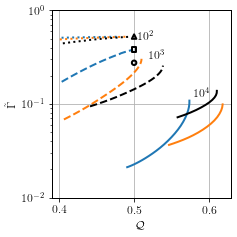

In [7]:
#Normalized unimodal traffic is 1/eta

def get_unimodal_traffic(x):
    rt = x**(-func.c)
    return rt

get_unimodal_trafficVectorized = np.vectorize(get_unimodal_traffic)

ELL = [0.2,0.4,0.8]
E_list = [100,1000,10000]

#unimodal quality
unimodal_quality = 1/(t_w + 1.5)

Q_thresh = 0.4

color_list = ['tab:blue','tab:orange','black']
ls_list = ['dotted','dashed','solid']
marker_list = ['^','s','o']
color_index = 0
ls_index = 0

fig,axs = plt.subplots(figsize=(246.09686/72.27, 246.09686/72.27))
params = {
    'backend': 'ps',
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'text.usetex': True,
    'axes.linewidth': 1.0,
    'figure.figsize': (2.1*246.09686/72.27, 246.09686/72.27),
    'axes.titlesize': 12,
}
plt.rcParams.update(params)


for E in E_list:
    ls = ls_list[ls_index]
    color_index = 0
    
    #get uni-modal traffic for all E above
    unimodal_traffic = get_unimodal_trafficVectorized(E)
    marker = marker_list[ls_index]
    plt.scatter(unimodal_quality,unimodal_traffic,lw=2.0,s=20,facecolor='none',edgecolor='black',marker=marker,zorder=3,label='{}'.format(fmt(E)))

    for l in ELL:
        color = color_list[color_index]
        #read data
        Q_pareto_SupplyDemand = pd.read_csv('data/Pareto_SupplyDemand%d_l_%0.2f.csv'%(E,l))
        
        #Select the data for which quality>Q_thresh
        Q_pareto_SupplyDemand = Q_pareto_SupplyDemand[Q_pareto_SupplyDemand['quality']>Q_thresh]
        d_c_thresh = Q_pareto_SupplyDemand['d_cut']
        bimodal_frac = Q_pareto_SupplyDemand['bimodal_frac']
        unimoal_frac = 1 - bimodal_frac
        uni_dist = 2*func.beta*l*bimodal_frac + func.get_dldcFuniVectorized(d_c_thresh)
        
        traffic_pareto_SupplyDemand = func.get_trafficVectorized(l,d_c_thresh)*(E**(-func.c))
        total_traffic_pareto_SupplyDemand = traffic_pareto_SupplyDemand/uni_dist**2
        quality_pareto_SupplyDemand = Q_pareto_SupplyDemand['quality']
        #plt.scatter(quality_pareto_SupplyDemand,traffic_pareto_SupplyDemand,color=color,facecolor='none',marker=marker,lw=1.0,s=8,zorder=2)
        plt.plot(quality_pareto_SupplyDemand,total_traffic_pareto_SupplyDemand,color=color,ls=ls,lw=2.0,zorder=2)
        #print(color)
        plt.xlabel(r'$\mathcal{Q}$')
        plt.ylabel(r'$\tilde{\Gamma}$')
        color_index+=1
    ls_index+=1

plt.ylim(0.01,1.0)
plt.annotate(r'$10^2$',xy=(0.505,0.48),color='black',fontsize=12)
plt.annotate(r'$10^3$',xy=(0.52,0.3),color='black',fontsize=12)
plt.annotate(r'$10^4$',xy=(0.58,0.12),color='black',fontsize=12)
plt.yscale('log')

#plt.legend()
plt.grid(visible=True)
plt.tight_layout()
plt.savefig('traffic_total.pdf')